In [7]:
#from Casos import (data_1A,data_1BC,data_2A,data_2BC,data_3ABC,data_4BC)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp, factorial, log

In [ ]:
nN = 100
NTU = np.geomspace(0.001, 50, nN)
def caso_4BC(caso, R, NTU, N_p, N_r):
    N = N_p * N_r
    rho:float = exp(-NTU / N)
    lambda_:float = R * N_r * (1 - rho)

    a = np.zeros((N + 1, N_p,N))
    alpha = np.zeros((N + 1, N+1, N_r+1))
    tau = np.zeros((N_p+1, N_r+1, 2))
    b = np.zeros((N+1, N_p, N_r))
    c = np.zeros((N+1, N_p, N_r))
    
    C = np.zeros((N_r, N_r))
    B = np.zeros((N_r)) 
    s_beta = np.zeros((N_p, N_r))
    bet = np.zeros((N+1, N_p, N_r+1))
                    
    gamma = np.zeros((N+1, N+2, N_r+1))
    N_b = np.zeros(N_r)
    N_a = np.zeros(N_r)
    N_c = np.zeros(N_r)
    s_b = np.zeros((N_p, N_r))
    s_bi = np.zeros(N_r)
    s_betai = np.zeros(N_r)           
    for q in range(1,N_r+1):
        tau[N_p - 1, q-1, 0] = 1

    for l in range(1,3):
       
        
        for j in range(1,N_r+1):
            
            
           
        
            for p in range(1,N_p+1):
             
                for q in range(1,N_r+1):
                    if l == 1 and p == 1 and N_p != 1:
                        if q != j:
                            tau[0, q-1, 0] = 0
                        else:
                            tau[0, j-1, 0] = 1

                    if l == 1:
                        tau[p, q-1, 0] = 1

                    if N_p % 2 == 0:
                        iN = N_p / 2
                        N_alpha =  iN  * N_r - 1
                    else:
                        iN = (N_p + 1) / 2
                        N_alpha =  (iN - 1) * N_r - 1

                    N_b[q-1] =  (iN - 1) * N_r - 1 + q
                    N_c[q-1] = N_b[q-1]
                    N_a[q-1] = N_c[q-1] - 1
                    N_beta = N_alpha
                  

                    if N_a[q-1]<0:
                        N_a[q-1] = 0
                    if N_b[q-1]<0:
                        N_b[q-1]= 0
                        N_b[q-1]= 0
                    if N_alpha<0:
                        N_alpha=0
                        N_beta=0
                        
                    s_beta[p-1,q-1] = 0
                    for k in range(0, int(N_beta) + 1):
                        s_beta1 = 0
                        for j1 in range(k, int(N_beta + 1)):
                            s_beta1 += alpha[j1, p-1, q-1] * (factorial(j1) * (-1 / (2 * lambda_)) ** (j1 - k))
                        bet[k, p-1, q-1] = (1 / (2 * factorial(k))) * s_beta1
                        s_beta[p-1, q-1] += bet[k, p-1, q-1]
                        gamma[k, p-1, q-1] = rho * alpha[k, p-1, q-1] + (1 - rho) * bet[k, p-1, q-1]

                        if q != N_r :
                            alpha[k, p-1, q ] = gamma[k, p-1, q-1]
                    
                    for k in range(0,int(N_a[q-1]+1)):
                        s_beta1=0
                        for j1 in range(k,int(N_beta)+1):
                            s_beta1+=(alpha[j1,p-1,q-1])*(factorial(j1)*(-1/(2*lambda_))**(j1-k))

                        bet[k,p-1,q-1]=(1/(2*factorial(k)))*s_beta1
                        gamma[k,p-1,q-1]=rho*alpha[k,p-1,q-1]+(1-rho)*bet[k,p-1,q-1]
                        if q!=N_r:
                            alpha[k,p-1,q]=gamma[k,p-1,q-1]  

                    
        
                    s_b[p-1,q-1] = 0
                    for k in range(0,int(N_b[q-1]) + 1):
                        if k >= 1:
                            b[k, p-1, q-1] = (lambda_ * a[k - 1, p-1, q-1]) / k
                            s_b[p-1, q-1] += b[k, p-1, q-1]
                        else:
                            b[0, p-1, q-1] = tau[p-1, q-1, 0] - bet[0, p-1, q-1]

                        c[k, p-1, q-1] = rho * a[k, p-1, q-1] + (1 - rho) * b[k, p-1, q-1]

                        if q != N_r :
                                a[k, p-1, q ] = c[k, p-1, q-1]
                                
                #!!!!!!!!!!!!!!!!!!!! fin q
                if p != N_p:
                    for k in range(0,int(N_alpha + 1)):
                        s_alpha = 0
                        for j1 in range(k, int(N_alpha + 1)):
                            s_alpha += c[j1, p-1, N_r - 1] * (factorial(j1) / factorial(j1 - k))
                        alpha[k, p , 0] = ((-1) ** k) * (exp(-lambda_) / factorial(k)) * s_alpha

                    for k in range(0,int(N_a[q-1]) + 1):
                        s_a = 0
                        for j1 in range(k, int(N_a[q-1]) + 1):
                            s_a += gamma[j1, p-1, N_r - 1] * (factorial(j1) / factorial(j1 - k))
                        a[k, p , 0] = ((-1) ** k )* (exp(lambda_) / factorial(k)) * s_a

                    for q in range(1,N_r+1):
                        s_beta[p,q-1] = 0  
                        for k in range(0,int(N_beta+1)):
                            s_beta1=0
                            for j1 in range(k,int(N_beta+1)):
                                s_beta1+=(alpha[j1,p,q-1])*(factorial(j1)*(-1/(2*lambda_))**(j1-k))
                            
                            bet[k,p,q-1]=(1/(2*factorial(k)))*s_beta1
                            s_beta[p,q-1]+=bet[k,p,q-1]
                            gamma[k,p,q-1]=rho*alpha[k,p,q-1]+(1-rho)*bet[k,p,q-1]
                            if q!=N_r:
                                alpha[k,p,q]=gamma[k,p,q-1] 

                        for l1 in range (1,3):
                            s_b[p,q-1] = 0
                            for k in range(0,int(N_b[q-1]+1)):
                                if k>=1:
                                    b[k,p,q-1]=(lambda_*a[k-1,p,q-1])/k
                                    s_b[p,q-1]+=b[k,p,q-1]
                                else:
                                    b[0,p,q-1]=tau[p,q-1,0]-bet[0,p,q-1]
            
                                c[k,p,q-1]=rho*a[k,p,q-1]+(1-rho)*b[k,p,q-1]
                                if q!=N_r:
                                    a[k,p,q]=c[k,p,q-1]
                                
                            
                            tau[p,q-1,0]=exp(lambda_)*tau[p-1,q-1,0]-exp(2*lambda_)*s_beta[p,q-1]+bet[0,p,q-1]-s_b[p,q-1];
                        


            for p in range(1,N_p+1):
                if p != N_p :
                    for q in range(1,N_r+1):    
                        if caso == '4B':
                            tau[p, q-1, 1] = tau[p-1, q-1, 0]
                            
                        elif caso == '4C':
                            tau[p, q-1, 1] = tau[p-1, N_r - q, 0]
                        else:
                            tau[p, q-1, 1] = tau[p-1, q-1, 0]
            
            
            if N_p != 1 and l == 1:
                
                for i in range(1,N_r+1):
                    s_betai[i-1] = 0
                    s_bi[i-1] = 0
                    for k in range(0,int(N_beta+1)):
                        s_betai[i-1] =s_betai[i-1] +  bet[k, N_p - 1, i-1]
                        
                    for k in range(1,int(N_b[i-1]+1)):
                        s_bi[i-1] += b[k, N_p - 1, i-1]
                    B[i-1] = 1
                

                    C[i-1, j-1] = exp(lambda_) * tau[N_p - 2, i-1, 0] - exp(2 * lambda_) * s_betai[i-1] + np.mean(bet[0, N_p - 1, i-1]) - s_bi[i-1]
                    tau[N_p-1, i-1, 0] = C[i-1,0]

        if N_p!=1 and l==1:
            
                
            Cf = np.linalg.solve(C ,B)
      
            for j in range(1,N_r+1):
                tau[0,j-1,0]=Cf[j-1]



    sb2 = 0
    
    for q in range(1,N_r+1):
        sb1=0    
        for k in range(0,q):
            sb1 +=  b[k,0,q-1]
        
        tau[0, q-1, 1] = exp(-lambda_) * sb1
        
        sb2 = sb2 + tau[0, q-1, 1]

    tau_F = (1 / N_r) * sb2

    P = (1 - tau_F) / R
    if R == 1:
        chi = P / (1 - P)
    else:
        try:

            chi = (1 / (R - 1)) * log((1 - P) / (1 - R * P))
        except:
            chi=0
    F = chi / NTU

    return P, F
def data_4BC(N_p,N_r,caso,R_list):
    dic={}
    for R in R_list:
        F = np.zeros(len(NTU))
        P = np.zeros(len(NTU))
        for i,NUT in enumerate(NTU):
            F[i],P[i] = caso_4BC(caso,R,NUT,N_p,N_r)
        dic[R] = {'F':F,'P':P}
    return dic

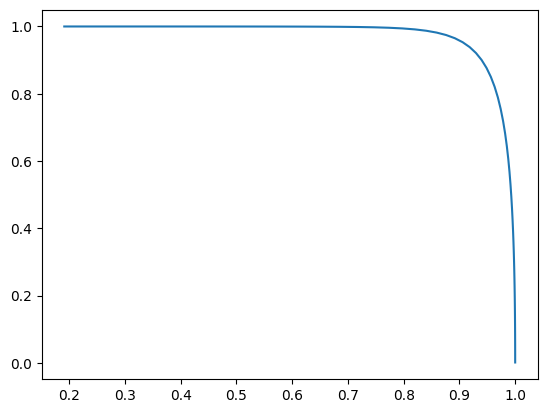

In [38]:
dic =  data_4BC(1,4,'4B',[0.1])
for i in dic:
    df=pd.DataFrame(dic[i])
    plt.plot(df['P'],df['F'])
plt.show()


In [2]:
dic = {}
dic[1]={'A',12}
dic[2]={'A',12}

len(dic)


2